In [1]:
%load_ext autoreload
%autoreload 1
%aimport utils
%aimport utils.path
%aimport utils.backtest
%aimport utils.backtest_result
%aimport solvers
%aimport solvers.DRconditionalmeanvariance

In [2]:
import tushare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import sys
import factors

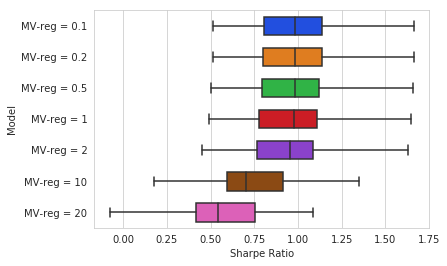

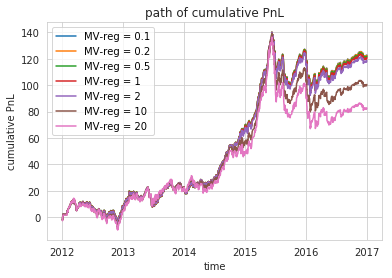

Sharpe Ratio:
MV-reg = 0.1                                      	mean:0.988	std:0.234
MV-reg = 0.2                                      	mean:0.986	std:0.234
MV-reg = 0.5                                      	mean:0.981	std:0.234
MV-reg = 1                                        	mean:0.970	std:0.233
MV-reg = 2                                        	mean:0.947	std:0.232
MV-reg = 10                                       	mean:0.744	std:0.229
MV-reg = 20                                       	mean:0.555	std:0.241
PnL stats:
MV-reg = 0.1                                      	mean:0.102	std:1.652
MV-reg = 0.2                                      	mean:0.102	std:1.652
MV-reg = 0.5                                      	mean:0.102	std:1.653
MV-reg = 1                                        	mean:0.101	std:1.655
MV-reg = 2                                        	mean:0.099	std:1.661
MV-reg = 10                                       	mean:0.084	std:1.775
MV-reg = 20                            

In [3]:
models = []
reg_params_list = [0.1,0.2,0.5,1,2,10,20]
for reg_params in reg_params_list:
    mean_variance_model = utils.backtest_result.ModelConfig(
        model_name = 'MV-reg = {}'.format(reg_params),
        solver = solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel,
        solver_name_prefix = 'vanilla_',
        reg_params = reg_params
    )
    models.append(mean_variance_model)
utils.backtest_result.plot_backtest_result(
    exp_num=50, 
    seed=42, 
    model_config_list = models)

In [20]:
equal_weight_model = utils.backtest_result.ModelConfig(
    model_name = 'Equal Weighted',
    solver = solvers.simple.equal_weight
)
mean_variance_model = utils.backtest_result.ModelConfig(
    model_name = 'Mean Variance Model',
    solver = solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel,
    solver_name_prefix = 'vanilla_',
    reg_params = 1
)
conditional_model = utils.backtest_result.ModelConfig(
    model_name = 'Conditional Mean Variance',
    solver = solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel,
    solver_name_prefix = 'fama_french_',
    reg_params = 1
)
DR_model = utils.backtest_result.ModelConfig(
    model_name = 'DR model',
    solver = solvers.DRmeanvariance.DR_mean_variance_long_only_opt_mosek_kernel_p2,
    delta = 0.5,
    p = 2,
    reg_params = 1
)
Winf_DR_conditional_model = utils.backtest_result.ModelConfig(
    model_name = 'Winfinity DR Conditional',
    solver = solvers.DRconditionalmeanvariance.DR_Winfty_conditional_mean_variance_long_only_opt_cvx_kernel, 
    reg_params = 1, 
    gamma_quantile = 0.25, 
    rho_quantile = 0.25
)
W2_DR_conditional_model = utils.backtest_result.ModelConfig(
    model_name = 'W2 DR Conditional',
    solver = solvers.DRconditionalmeanvariance.DR_W2_conditional_mean_variance_long_only_opt_cvx_kernel, 
    reg_params = 1, 
    epsilon = 0.5, 
    rho_div_rho_min = 1.1
)

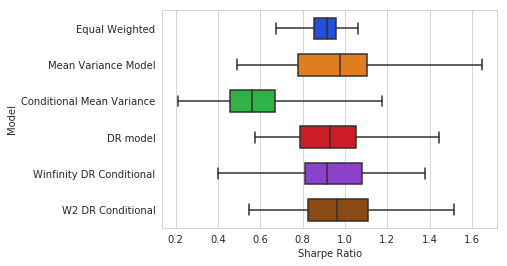

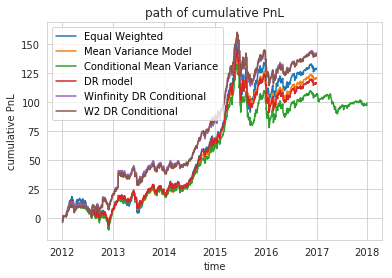

Sharpe Ratio:
Equal Weighted                                    	mean:0.894	std:0.098
Mean Variance Model                               	mean:0.970	std:0.233
Conditional Mean Variance                         	mean:0.582	std:0.211
DR model                                          	mean:0.924	std:0.179
Winfinity DR Conditional                          	mean:0.940	std:0.215
W2 DR Conditional                                 	mean:0.976	std:0.211
PnL stats:
Equal Weighted                                    	mean:0.107	std:1.912
Mean Variance Model                               	mean:0.101	std:1.655
Conditional Mean Variance                         	mean:0.069	std:1.868
DR model                                          	mean:0.097	std:1.677
Winfinity DR Conditional                          	mean:0.118	std:2.709
W2 DR Conditional                                 	mean:0.117	std:2.601


In [21]:
utils.backtest_result.plot_backtest_result(
    exp_num=50, 
    seed=42, 
    model_config_list = [equal_weight_model,
                        mean_variance_model,
                        conditional_model,
                        DR_model,
                        Winf_DR_conditional_model,
                        W2_DR_conditional_model])

In [22]:
W2_DR_conditional_model = utils.backtest_result.ModelConfig(
    model_name = 'W2 DR Conditional',
    solver = solvers.DRconditionalmeanvariance.DR_W2_conditional_mean_variance_long_only_opt_cvx_kernel, 
    reg_params = 1, 
    epsilon = 0.5, 
    rho_div_rho_min = 1.1
)

In [7]:
solver, solver_name_prefix, solver_kwargs = W2_DR_conditional_model.solver, W2_DR_conditional_model.solver_name_prefix, W2_DR_conditional_model.solver_kwargs
exp = 10; seed = 42
file_fmt = utils.path.get_file_path_and_create_dir(exp, seed, solver, solver_name_prefix, **solver_kwargs)
pd.read_pickle(file_fmt.format('stock_weights')).loc['20130207']

600378.SH    1.074955e-03
002320.SZ    1.592882e-08
000622.SZ    9.474688e-01
000767.SZ    1.332809e-02
600757.SH    1.330085e-07
002321.SZ    7.061296e-04
000815.SZ    9.821986e-03
600581.SH    2.990984e-09
600871.SH    1.043127e-08
600028.SH    2.759967e-02
600761.SH    1.266022e-08
600644.SH    8.063451e-09
600262.SH    1.046742e-08
000850.SZ    1.067550e-08
600721.SH    5.982906e-09
600395.SH    1.069959e-08
600368.SH    1.523543e-08
600426.SH    2.670665e-08
000408.SZ    3.525181e-08
600890.SH    6.780573e-08
Name: 2013-02-07 00:00:00, dtype: float64

# Start cross validation plot

In [5]:
exp_num = 50
seed = 42
DRCME_inf_params = {
    'model_name': ['Winfinity DR Conditional'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.DRconditionalmeanvariance.DR_Winfty_conditional_mean_variance_long_only_opt_cvx_kernel], 
    'start_index':['2012'],
    'end_index':['2014'],
    'reg_params':[1], 
    'gamma_quantile':[0.1, 0.25, 0.5], 
    'rho_quantile':[0.05, 0.1, 0.25], 
}
DRCME_2_params = {
    'model_name': ['W2 DR Conditional'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.DRconditionalmeanvariance.DR_W2_conditional_mean_variance_long_only_opt_cvx_kernel_new], 
    'start_index':['2012'],
    'end_index':['2014'],
    'reg_params':[1], 
    'epsilon':[0.1,0.2,0.5], 
    'rho_div_rho_min':[1.1]
}
equal_weight_params = {
    'model_name': ['Equal Weighted'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.simple.equal_weight], 
    'start_index':['2012'],
    'end_index':['2014'],
}
DR_params = {
    'model_name': ['DR model'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.DRmeanvariance.DR_mean_variance_long_only_opt_mosek_kernel_p2], 
    'reg_params':[1],
    'delta': [0.1,0.5],
    'p': [2],
    'start_index':['2012'],
    'end_index':['2014'],
}
mean_variance_params = {
    'model_name': ['Mean Variance Model'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel], 
    'solver_name_prefix': ['vanilla_'],
    'reg_params':[1], 
    'start_index':['2012'],
    'end_index':['2014'],
}
conditional_mean_variance_params = {
    'model_name': ['Conditional Mean Variance'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel], 
    'solver_name_prefix': ['fama_french_'],
    'reg_params':[1], 
    'start_index':['2012'],
    'end_index':['2014'],
}

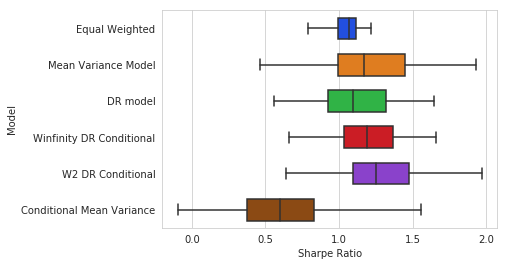

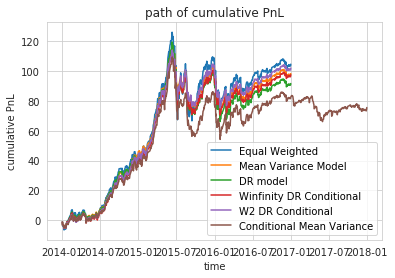

Sharpe Ratio:
Equal Weighted                                    	mean:1.054	std:0.090
Mean Variance Model                               	mean:1.221	std:0.338
DR model                                          	mean:1.113	std:0.266
Winfinity DR Conditional                          	mean:1.178	std:0.258
W2 DR Conditional                                 	mean:1.279	std:0.291
Conditional Mean Variance                         	mean:0.612	std:0.315
PnL stats:
Equal Weighted                                    	mean:0.143	std:2.156
Mean Variance Model                               	mean:0.134	std:1.770
DR model                                          	mean:0.125	std:1.802
Winfinity DR Conditional                          	mean:0.133	std:1.811
W2 DR Conditional                                 	mean:0.139	std:1.747
Conditional Mean Variance                         	mean:0.077	std:2.001
stock weights sparsity:
Equal Weighted                                    	mean:15.000	std:8.660
Mean Variance 

In [6]:
utils.backtest_result.plot_backtest_cross_validation_result(exp_num, seed, [equal_weight_params,
                                                                            mean_variance_params,
                                                                            DR_params,
                                                                            DRCME_inf_params,
                                                                            DRCME_2_params,
                                                                            conditional_mean_variance_params])

In [46]:
exp_num = 50
seed = 42
DRCME_inf_params = {
    'model_name': ['DRCMV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.DRconditionalmeanvariance.DR_Winfty_conditional_mean_variance_long_only_opt_cvx_kernel], 
    'start_index':['2012'],
    'end_index':['2014'],
    'reg_params':[0.1], 
    'gamma_quantile':[0.1, 0.25, 0.5], 
    'rho_quantile':[0.05, 0.1, 0.25], 
}
DRCME_2_params = {
    'model_name': ['OTCMV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.DRconditionalmeanvariance.DR_W2_conditional_mean_variance_long_only_opt_cvx_kernel_new], 
    'start_index':['2012'],
    'end_index':['2014'],
    'reg_params':[0.1], 
    'epsilon':[0.1,0.2,0.5], 
    'rho_div_rho_min':[1.1,1.2]
}
equal_weight_params = {
    'model_name': ['EW'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.simple.equal_weight], 
    'start_index':['2012'],
    'end_index':['2014'],
}
DR_params = {
    'model_name': ['DRMV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.DRmeanvariance.DR_mean_variance_long_only_opt_mosek_kernel_p2], 
    'reg_params':[0.1],
    'delta': [0.1,0.2,0.5],
    'p': [2],
    'start_index':['2012'],
    'end_index':['2014'],
}
mean_variance_params = {
    'model_name': ['MV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel], 
    'solver_name_prefix': ['vanilla_'],
    'reg_params':[5], 
    'start_index':['2012'],
    'end_index':['2014'],
}
conditional_mean_variance_params = {
    'model_name': ['CMV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel], 
    'solver_name_prefix': ['fama_french_'],
    'reg_params':[0.1], 
    'start_index':['2012'],
    'end_index':['2014'],
}

In [48]:
plt.rc('axes', facecolor='#dedede', edgecolor='none',
       axisbelow=True, grid=True)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='black')
plt.rc('ytick', direction='out', color='black')
plt.rc('patch', edgecolor='#dedede')
plt.rcParams['figure.figsize'] = 8,6
plt.rcParams['font.size'] = 14
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

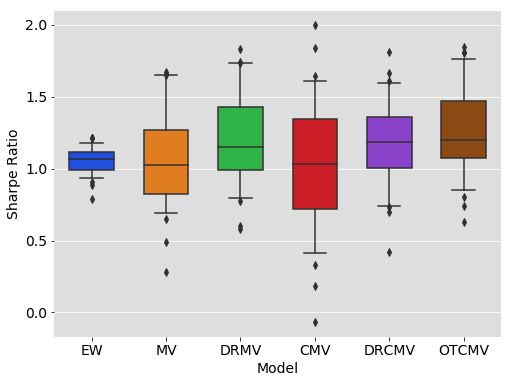

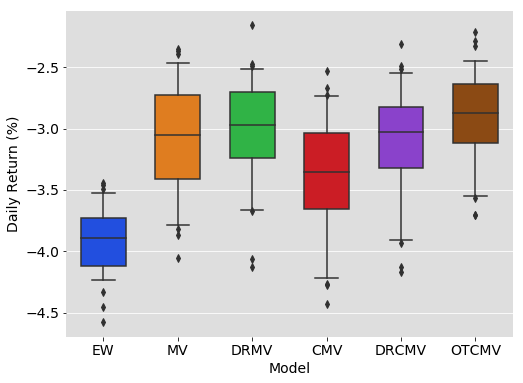

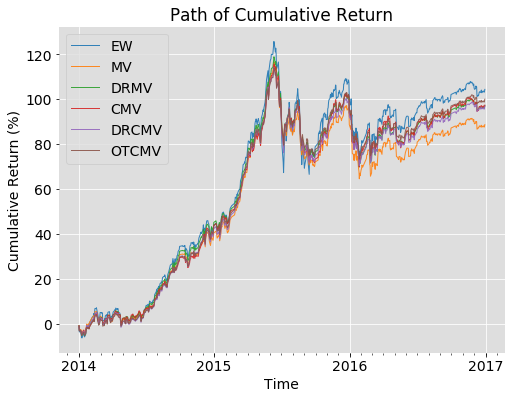

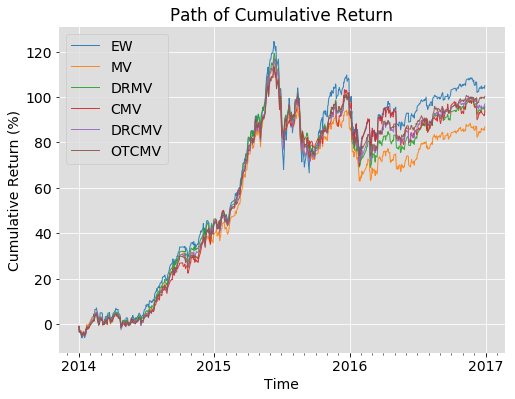

Sharpe Ratio:
EW                                                	mean:1.054	std:0.090
MV                                                	mean:1.070	std:0.318
DRMV                                              	mean:1.204	std:0.296
CMV                                               	mean:1.018	std:0.431
DRCMV                                             	mean:1.175	std:0.284
OTCMV                                             	mean:1.260	std:0.291
PnL stats:
EW                                                	mean:0.143	std:2.156
MV                                                	mean:0.121	std:1.816
DRMV                                              	mean:0.133	std:1.777
CMV                                               	mean:0.133	std:2.103
DRCMV                                             	mean:0.132	std:1.811
OTCMV                                             	mean:0.137	std:1.741
stock weights sparsity:
EW                                                	mean:15.000	std:8.660
MV            

In [50]:
utils.backtest_result.plot_backtest_cross_validation_result(exp_num, seed, [equal_weight_params,
                                                                            mean_variance_params,
                                                                            DR_params,
                                                                            conditional_mean_variance_params,
                                                                            DRCME_inf_params,
                                                                            DRCME_2_params])